### This is a sample how we can detect outliers in each cluster.

Dataset (a CSV file) has many columns. Each column is a dimension and row is an observation, case or better say a data point in that n-dimensions' space. It is easy to present clusters (groups) in 2 or 3 dimensions' space but it is hard to visualize groups in 10 or 50-dimensions' space. For our sample, we use 2 dimensions where each group is a circle of dots on the plot. But in reality, there could be 100, 500-dimensions' space. Luckily, the math under the hood stays the same no matter how many dimensions we have.  

#### 1) First we cluster data into groups (clusters). Each cluster has its own center. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from util_distances_in_clusters import plot_kmeans, calc_distances, annotate_data_points

In [2]:
# Generate some data
X, y_true = make_blobs(n_samples=20, centers=2, cluster_std=0.80, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

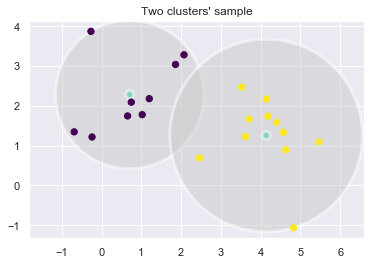

In [3]:
# Plot the data with K Means Labels
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit(X).predict(X)
ax = plot_kmeans(plt, kmeans, X, title='Two clusters\' sample')

#### 2) Second we calculate distances from every data point to its cluster center. And show distances in terms of STD.

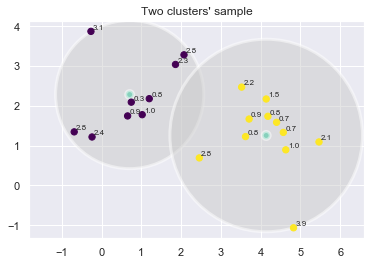

In [4]:
# Plot observations with labels as distances to the center of each cluster center in terms of STD
std_distances = calc_distances(X, kmeans)
ax = plot_kmeans(plt, kmeans, X, title='Two clusters\' sample')
annotate_data_points(ax, std_distances)

In the above picture, you can see two clusters and each has its own center. We label each data point with a number of STD - how far that point lies from the center of its cluster in terms of STD. 

We calculate STD among all distances in each cluster from each data point to the center of its cluster. Then every distance is divided by its cluster's STD.